# Regression logistique

(644, 3)
float64    2
int64      1
dtype: int64


Text(0, 0.5, 'Admit')

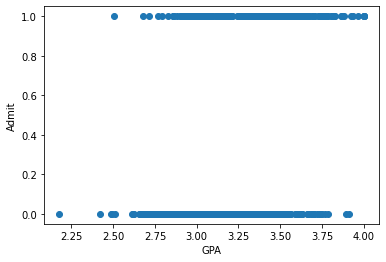

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("admissions.csv",delimiter=",")

data.head()
print(data.shape)
print(data.dtypes.value_counts())

gpa   = data["gpa"]
admit = data["admit"]

x = gpa
y = admit
plt.scatter(x,y)
plt.xlabel("GPA")
plt.ylabel("Admit") 

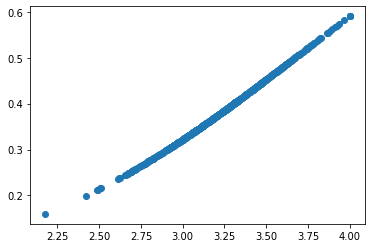

In [25]:
#Le paramètre solver est utile pour les petits dataset
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(data[["gpa"]],admit)

#calcul des probabilités que la ligne appartienne au label 1
prob = logistic_model.predict_proba(data[["gpa"]])
plt.scatter(gpa, prob[:,1] )

In [33]:
#Prediction des libellés
fitted_labels = logistic_model.predict(data[["gpa"]])

#création colonne
data["predicted_label"] = fitted_labels

print(data["predicted_label"].value_counts())

#vérification de la précision de la prediction, nombre de libellés corrects par le nombre d'observation
data["actual_label"] = admit
matches = data["predicted_label"] == data["actual_label"]
correct_predictions = data[matches]
correct_predictions.head()
accuracy = len(correct_predictions) / len(data)
print(accuracy)
#on prend les 10 premières valeurs
#fitted_labels[:10]
#plt.scatter(gpa, fitted_labels)


0    598
1     46
Name: predicted_label, dtype: int64
0.6459627329192547


### Classification binaire

In [43]:
#on a bien prédit dans 31 cas que le candidat serait accepté
true_positive = (data["predicted_label"] == 1) & (data["actual_label"] == 1)
true_positives = len(data[true_positive])

#on a bien prédit dans 385 cas candidat serait rejetté
true_negative = (data["predicted_label"] == 0) & (data["actual_label"] == 0)
true_negatives = len(data[true_negative])

#on a bien prédit dans 213 cas que le candidat serait rejetté par le modèle alors que l'étudiant a été admis
false_negative = (data["predicted_label"] == 0) & (data["actual_label"] == 1)
false_negatives = len(data[false_negative])


false_positive = (data["predicted_label"] == 1) & (data["actual_label"] == 0)
false_positives = len(data[false_positive])

print(true_positives)
print(true_negatives)
print(false_negatives)
print(false_positives)

#Dans quelle mesure ce modèle identifie des résultats positifs ?
#On obtient 12% environ des cas positifs, cela signifie que 1 éléve sur 8 qui aurait dû être admis a été effectivement admis
sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)


31
385
213
15
0.12704918032786885


### Calcul du True Negative Rate - TNR

In [44]:
#dans quelle mesure ce modèle identifie les résultats négatifs, condidats qui devraient être rejettés ?
#Le modèle est efficace pour savoir quel candidat rejetté : 96,25% 
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.9625
